## 広島MAP

In [1]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

# for Mac
# mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
mpl.rc('font',family='MS Gothic')


In [3]:
# 空間データなので geopandas (gpd) でインポート

hmesh1 = gpd.read_file('data2/SDDSWS5132.zip')
hmesh2 = gpd.read_file('data2/SDDSWS5133.zip')
hmesh3 = gpd.read_file('data2/SDDSWS5232.zip')
hmesh4 = gpd.read_file('data2/SDDSWS5233.zip')

In [4]:
# ファイルの統合
# combine all four mesh shapes
hiroshimamesh = gpd.pd.concat([hmesh1,hmesh2,hmesh3,hmesh4])

<Axes: >

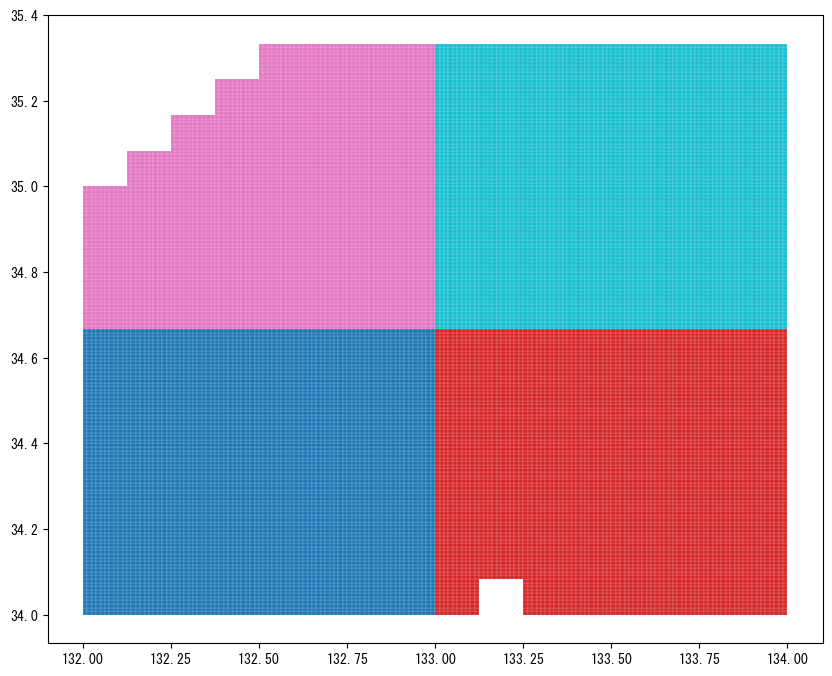

In [5]:
# quick plot
hiroshimamesh.plot(figsize=(10,10),edgecolor='white',linewidth=0.1,column = 'MESH1_ID')

In [9]:
# csvデータなので pandas (pd) でインポート
# 文字化け予防のために encoding='cp932' 
hdata1 = pd.read_csv('data2/tblT001100S5132.zip', encoding='cp932')
hdata4 = pd.read_csv('data2/tblT001100S5133.zip', encoding='cp932')
hdata2 = pd.read_csv('data2/tblT001100S5232.zip', encoding='cp932')
hdata3 = pd.read_csv('data2/tblT001100S5233.zip', encoding='cp932')
hdata5 = pd.read_csv('data2/tblT000846S5132.zip', encoding='cp932')
hdata6 = pd.read_csv('data2/tblT000846S5133.zip', encoding='cp932')
hdata7 = pd.read_csv('data2/tblT000846S5232.zip', encoding='cp932')
hdata8 = pd.read_csv('data2/tblT000846S5233.zip', encoding='cp932')

In [10]:
# check data
hdata1.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
0,NaN,NaN,NaN,NaN,人口（総数）,人口（総数） 男,人口（総数） 女,０～１４歳人口 総数,０～１４歳人口 男,０～１４歳人口 女,...,６人世帯数 一般世帯数,７人以上世帯数 一般世帯数,親族のみの世帯数 一般世帯数,核家族世帯数 一般世帯数,核家族以外の世帯数 一般世帯数,６歳未満世帯員のいる世帯数 一般世帯数,６５歳以上世帯員のいる世帯数 一般世帯数,世帯主の年齢が２０～２９歳の１人世帯数 一般世帯数,高齢単身世帯数 一般世帯数,高齢夫婦世帯数 一般世帯数
1,51320000.0,0.0,NaN,NaN,158,78,80,11,6,5,...,3,0,48,39,9,4,51,0,12,17
2,51320001.0,0.0,NaN,NaN,36,22,14,0,0,0,...,0,0,12,11,1,0,11,0,3,4
3,51320002.0,0.0,NaN,NaN,18,7,11,0,0,0,...,0,0,7,6,1,0,8,0,2,3
4,51320003.0,0.0,NaN,NaN,54,33,21,5,3,2,...,1,0,13,10,3,1,13,0,4,2


In [11]:
# ４つのテーブルから１行目を削除
hdata1 = hdata1[1:]
hdata2 = hdata2[1:]
hdata3 = hdata3[1:]
hdata4 = hdata4[1:]
hdata5 = hdata5[1:]
hdata6 = hdata6[1:]
hdata7 = hdata7[1:]
hdata8 = hdata8[1:]

In [12]:
# ４つのテーブルから「＊」を非数に置き換える
hdata1 = hdata1.replace('*',np.NAN)
hdata2 = hdata2.replace('*',np.NAN)
hdata3 = hdata3.replace('*',np.NAN)
hdata4 = hdata4.replace('*',np.NAN)
hdata5 = hdata5.replace('*',np.NAN)
hdata6 = hdata6.replace('*',np.NAN)
hdata7 = hdata7.replace('*',np.NAN)
hdata8 = hdata8.replace('*',np.NAN)

In [13]:
# check data
hdata1.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,51320000.0,0.0,NaN,NaN,158,78,80,11,6,5,...,3,0,48,39,9,4,51,0,12,17
2,51320001.0,0.0,NaN,NaN,36,22,14,0,0,0,...,0,0,12,11,1,0,11,0,3,4
3,51320002.0,0.0,NaN,NaN,18,7,11,0,0,0,...,0,0,7,6,1,0,8,0,2,3
4,51320003.0,0.0,NaN,NaN,54,33,21,5,3,2,...,1,0,13,10,3,1,13,0,4,2
5,51320004.0,2.0,51320014.0,NaN,4,1,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# 4つのデータを統合
hiroshimadata2020 = pd.concat([hdata1,hdata2,hdata3,hdata4])

In [15]:
# 4つのデータを統合
hiroshimadata2015 = pd.concat([hdata5,hdata6,hdata7,hdata8])

In [17]:
hiroshimadata2015.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T000846001,T000846002,T000846003,T000846004,T000846005,T000846006,...,T000846032,T000846033,T000846034,T000846035,T000846036,T000846037,T000846038,T000846039,T000846040,T000846041
1,51320000.0,0.0,NaN,NaN,150,73,77,5,2,3,...,2,0,47,39,8,3,44,0,13,9
2,51320001.0,0.0,NaN,NaN,49,23,26,2,1,1,...,0,0,16,13,3,0,17,0,6,7
3,51320002.0,0.0,NaN,NaN,23,7,16,1,0,1,...,0,0,8,6,2,0,8,0,2,1
4,51320003.0,0.0,NaN,NaN,56,27,29,7,3,4,...,1,0,17,12,5,0,15,0,3,2
5,51320004.0,0.0,NaN,NaN,16,5,11,0,0,0,...,0,0,4,3,1,0,5,0,3,2


In [18]:
hiroshimadata2020.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,51320000.0,0.0,NaN,NaN,158,78,80,11,6,5,...,3,0,48,39,9,4,51,0,12,17
2,51320001.0,0.0,NaN,NaN,36,22,14,0,0,0,...,0,0,12,11,1,0,11,0,3,4
3,51320002.0,0.0,NaN,NaN,18,7,11,0,0,0,...,0,0,7,6,1,0,8,0,2,3
4,51320003.0,0.0,NaN,NaN,54,33,21,5,3,2,...,1,0,13,10,3,1,13,0,4,2
5,51320004.0,2.0,51320014.0,NaN,4,1,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# get rid of HTKSYORI, HTKSAKI, GASSAN
hiroshimadata2015=(hiroshimadata2015.drop(['HTKSYORI','HTKSAKI','GASSAN'],axis=1))

In [21]:
# get rid of HTKSYORI, HTKSAKI, GASSAN
hiroshimadata2020=(hiroshimadata2020.drop(['HTKSYORI','HTKSAKI','GASSAN'],axis=1))

In [22]:
hiroshimadata2015.head()

,KEY_CODE,T000846001,T000846002,T000846003,T000846004,T000846005,T000846006,T000846007,T000846008,T000846009,...,T000846032,T000846033,T000846034,T000846035,T000846036,T000846037,T000846038,T000846039,T000846040,T000846041
1,51320000.0,150,73,77,5,2,3,145,71,74,...,2,0,47,39,8,3,44,0,13,9
2,51320001.0,49,23,26,2,1,1,47,22,25,...,0,0,16,13,3,0,17,0,6,7
3,51320002.0,23,7,16,1,0,1,22,7,15,...,0,0,8,6,2,0,8,0,2,1
4,51320003.0,56,27,29,7,3,4,49,24,25,...,1,0,17,12,5,0,15,0,3,2
5,51320004.0,16,5,11,0,0,0,16,5,11,...,0,0,4,3,1,0,5,0,3,2


In [23]:
hiroshimadata2020.head()

,KEY_CODE,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,T001100007,T001100008,T001100009,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,51320000.0,158,78,80,11,6,5,147,72,75,...,3,0,48,39,9,4,51,0,12,17
2,51320001.0,36,22,14,0,0,0,36,22,14,...,0,0,12,11,1,0,11,0,3,4
3,51320002.0,18,7,11,0,0,0,18,7,11,...,0,0,7,6,1,0,8,0,2,3
4,51320003.0,54,33,21,5,3,2,49,30,19,...,1,0,13,10,3,1,13,0,4,2
5,51320004.0,4,1,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# combine 2015 and 2020 data
hiroshimadata = pd.merge(hiroshimadata2020,hiroshimadata2015,on='KEY_CODE')

In [25]:
# check data info
hiroshimadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13405 entries, 0 to 13404
Data columns (total 92 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    13405 non-null  float64
 1   T001100001  13405 non-null  object 
 2   T001100002  13405 non-null  object 
 3   T001100003  13405 non-null  object 
 4   T001100004  10754 non-null  object 
 5   T001100005  10754 non-null  object 
 6   T001100006  10754 non-null  object 
 7   T001100007  10754 non-null  object 
 8   T001100008  10754 non-null  object 
 9   T001100009  10754 non-null  object 
 10  T001100010  10754 non-null  object 
 11  T001100011  10754 non-null  object 
 12  T001100012  10754 non-null  object 
 13  T001100013  10754 non-null  object 
 14  T001100014  10754 non-null  object 
 15  T001100015  10754 non-null  object 
 16  T001100016  10754 non-null  object 
 17  T001100017  10754 non-null  object 
 18  T001100018  10754 non-null  object 
 19  T001100019  10754 non-nul

In [26]:
# まずはカラムをアウトプット
hiroshimadata.columns

Index(['KEY_CODE', 'T001100001', 'T001100002', 'T001100003', 'T001100004',
       'T001100005', 'T001100006', 'T001100007', 'T001100008', 'T001100009',
       'T001100010', 'T001100011', 'T001100012', 'T001100013', 'T001100014',
       'T001100015', 'T001100016', 'T001100017', 'T001100018', 'T001100019',
       'T001100020', 'T001100021', 'T001100022', 'T001100023', 'T001100024',
       'T001100025', 'T001100026', 'T001100027', 'T001100028', 'T001100029',
       'T001100030', 'T001100031', 'T001100032', 'T001100033', 'T001100034',
       'T001100035', 'T001100036', 'T001100037', 'T001100038', 'T001100039',
       'T001100040', 'T001100041', 'T001100042', 'T001100043', 'T001100044',
       'T001100045', 'T001100046', 'T001100047', 'T001100048', 'T001100049',
       'T001100050', 'T000846001', 'T000846002', 'T000846003', 'T000846004',
       'T000846005', 'T000846006', 'T000846007', 'T000846008', 'T000846009',
       'T000846010', 'T000846011', 'T000846012', 'T000846013', 'T000846014',
 

In [27]:
# 1番目以降をアウトプット
hiroshimadata.columns[1:]

Index(['T001100001', 'T001100002', 'T001100003', 'T001100004', 'T001100005',
       'T001100006', 'T001100007', 'T001100008', 'T001100009', 'T001100010',
       'T001100011', 'T001100012', 'T001100013', 'T001100014', 'T001100015',
       'T001100016', 'T001100017', 'T001100018', 'T001100019', 'T001100020',
       'T001100021', 'T001100022', 'T001100023', 'T001100024', 'T001100025',
       'T001100026', 'T001100027', 'T001100028', 'T001100029', 'T001100030',
       'T001100031', 'T001100032', 'T001100033', 'T001100034', 'T001100035',
       'T001100036', 'T001100037', 'T001100038', 'T001100039', 'T001100040',
       'T001100041', 'T001100042', 'T001100043', 'T001100044', 'T001100045',
       'T001100046', 'T001100047', 'T001100048', 'T001100049', 'T001100050',
       'T000846001', 'T000846002', 'T000846003', 'T000846004', 'T000846005',
       'T000846006', 'T000846007', 'T000846008', 'T000846009', 'T000846010',
       'T000846011', 'T000846012', 'T000846013', 'T000846014', 'T000846015',

In [28]:
# 元のデータを入れ替える
hiroshimadata[hiroshimadata.columns[1:]]=hiroshimadata[hiroshimadata.columns[1:]].astype(float)

In [29]:
# check data info
hiroshimadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13405 entries, 0 to 13404
Data columns (total 92 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    13405 non-null  float64
 1   T001100001  13405 non-null  float64
 2   T001100002  13405 non-null  float64
 3   T001100003  13405 non-null  float64
 4   T001100004  10754 non-null  float64
 5   T001100005  10754 non-null  float64
 6   T001100006  10754 non-null  float64
 7   T001100007  10754 non-null  float64
 8   T001100008  10754 non-null  float64
 9   T001100009  10754 non-null  float64
 10  T001100010  10754 non-null  float64
 11  T001100011  10754 non-null  float64
 12  T001100012  10754 non-null  float64
 13  T001100013  10754 non-null  float64
 14  T001100014  10754 non-null  float64
 15  T001100015  10754 non-null  float64
 16  T001100016  10754 non-null  float64
 17  T001100017  10754 non-null  float64
 18  T001100018  10754 non-null  float64
 19  T001100019  10754 non-nul

## Join Mesh with Data

In [30]:
# KEY_CODEをfloatに
hiroshimamesh['KEY_CODE']=hiroshimamesh['KEY_CODE'].astype(float)

In [31]:
# merge the data
hiroshimamesh = hiroshimamesh.merge(hiroshimadata, on='KEY_CODE')

In [32]:
# check!
hiroshimamesh.sample(5)

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry,T001100001,T001100002,T001100003,T001100004,...,T000846032,T000846033,T000846034,T000846035,T000846036,T000846037,T000846038,T000846039,T000846040,T000846041
1424,51324401.0,5132,44,01,3602,"POLYGON ((132.52500 34.33333, 132.51250 34.333...",3087.0,1478.0,1609.0,399.0,...,20.0,4.0,919.0,815.0,104.0,109.0,558.0,35.0,162.0,166.0
11115,52332563.0,5233,25,63,2164,"POLYGON ((133.67500 34.88333, 133.66250 34.883...",14.0,7.0,7.0,0.0,...,0.0,0.0,5.0,3.0,2.0,0.0,4.0,0.0,0.0,1.0
7476,52322240.0,5232,22,40,1841,"POLYGON ((132.26250 34.86667, 132.25000 34.866...",497.0,298.0,199.0,118.0,...,2.0,0.0,132.0,127.0,5.0,51.0,37.0,29.0,7.0,15.0
10145,52331086.0,5233,10,86,887,"POLYGON ((133.08750 34.81667, 133.07500 34.816...",19.0,12.0,7.0,1.0,...,0.0,1.0,4.0,2.0,2.0,0.0,6.0,0.0,2.0,1.0
9605,52330191.0,5233,01,91,192,"POLYGON ((133.15000 34.74167, 133.13750 34.741...",23.0,10.0,13.0,0.0,...,3.0,0.0,6.0,3.0,3.0,0.0,5.0,0.0,0.0,1.0


## Map time

In [33]:
# reproject to 3857 (web mercator)
hiroshimamesh = hiroshimamesh.to_crs(3857)

<Axes: >

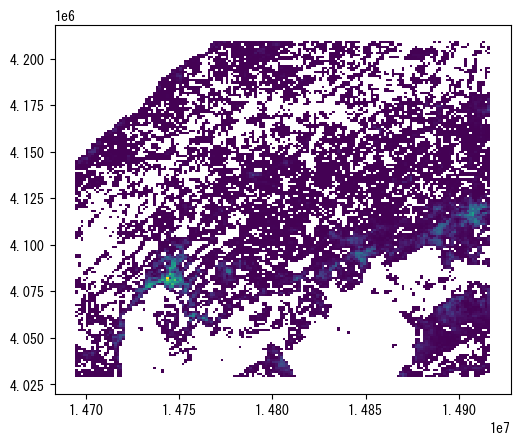

In [34]:
# make a quick plot
hiroshimamesh.plot(column='T001100001')

<Axes: >

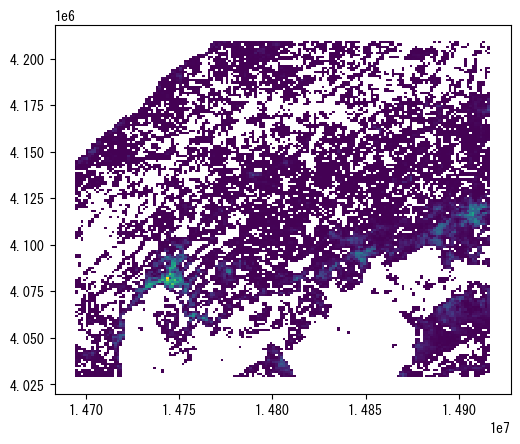

In [35]:
# make a quick plot
hiroshimamesh.plot(column='T000846001')

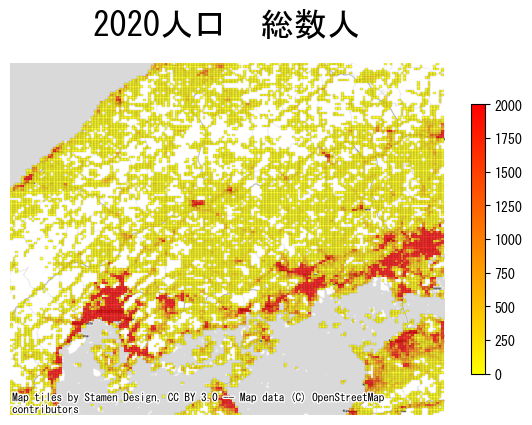

In [42]:
# 2020 population map
ax = hiroshimamesh.plot(figsize=(7,7),
         column='T001100001',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         legend_kwds={'shrink':0.5},
         vmin=0,
         vmax=2000
         )

# hide axes
ax.axis('off')

# title
ax.set_title('2020人口　総数人',fontsize=24, pad=20) # タイトルの周りにスペースを足すために pad=20

# サイズ変更（余分なところの消去）
ax.set_xlim(hiroshimamesh.total_bounds[0],hiroshimamesh.total_bounds[2])
ax.set_ylim(hiroshimamesh.total_bounds[1],hiroshimamesh.total_bounds[3])


# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

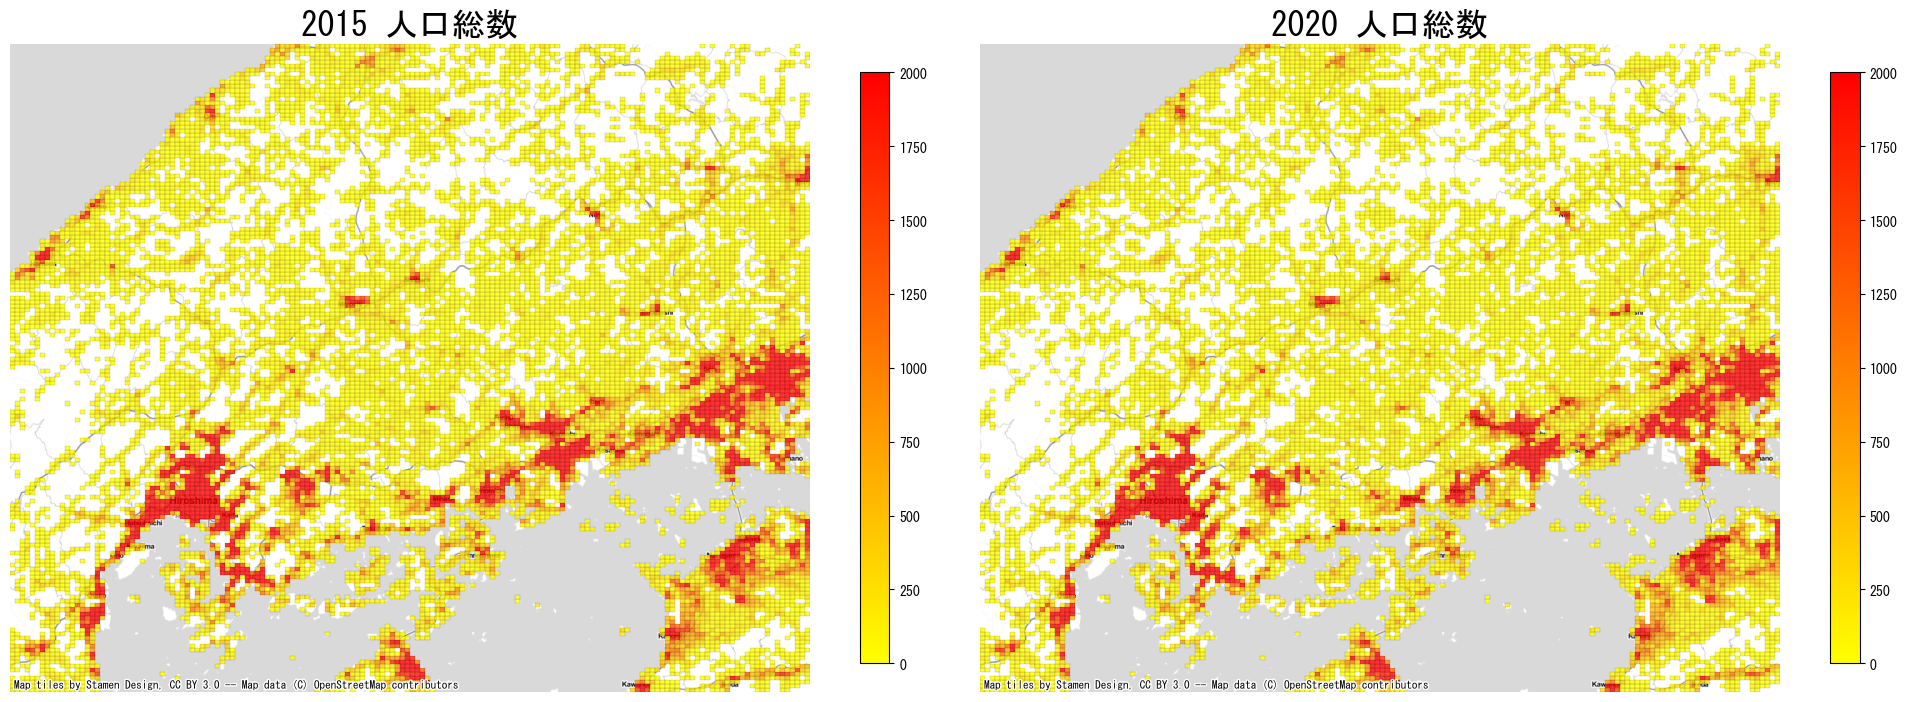

In [43]:
# population map
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,20)) # 1 row, 2 columns, side by side

# 2015 population
hiroshimamesh.plot(ax = ax[0], # 左のマップ
    column='T000846001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=2000)

# 2020 population
hiroshimamesh.plot(ax = ax[1], # 右のマップ
    column='T001100001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=2000)

# hide axes
ax[0].axis('off') # 左
ax[1].axis('off') # 右

# title
ax[0].set_title('2015 人口総数',fontsize=24); # 左
ax[1].set_title('2020 人口総数',fontsize=24); # 右

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = hiroshimamesh.total_bounds

# Set the plot limits based on the total bounds
ax[0].set_xlim(xmin, xmax) # 左
ax[0].set_ylim(ymin, ymax) # 左 
ax[1].set_xlim(xmin, xmax) # 右
ax[1].set_ylim(ymin, ymax) # 右

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax[0],source=cx.providers.Stamen.TonerLite) # 左
cx.add_basemap(ax[1],source=cx.providers.Stamen.TonerLite) # 右

## 感想

マップの余分なところや横のバーのmaxやminの変え方が分かりより綺麗なマップ作りに一歩近づいたんじゃないかと思います。でも、段々コードが長くなってきて難しさが増してきたなと思います。

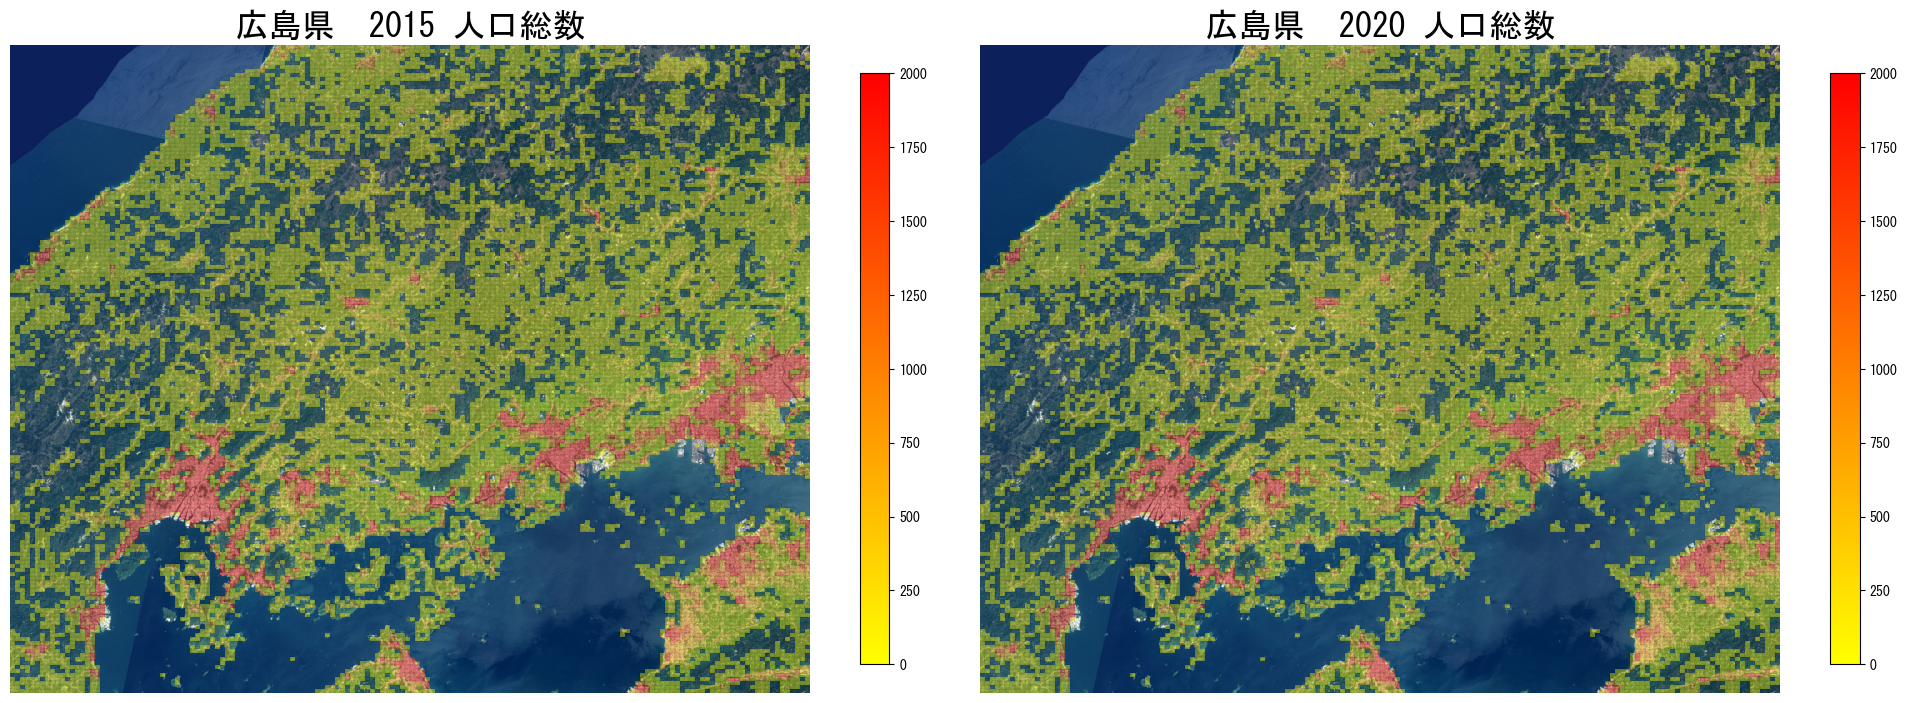

In [56]:
# population map
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,20)) # 1 row, 2 columns, side by side

# 2015 population
hiroshimamesh.plot(ax = ax[0], # 左のマップ
    column='T000846001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.4,
         vmin=0,
         vmax=2000)

# 2020 population
hiroshimamesh.plot(ax = ax[1], # 右のマップ
    column='T001100001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.4,
         vmin=0,
         vmax=2000)

# hide axes
ax[0].axis('off') # 左
ax[1].axis('off') # 右

# title
ax[0].set_title('広島県　2015 人口総数',fontsize=24); # 左
ax[1].set_title('広島県　2020 人口総数',fontsize=24); # 右

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = hiroshimamesh.total_bounds

# Set the plot limits based on the total bounds
ax[0].set_xlim(xmin, xmax) # 左
ax[0].set_ylim(ymin, ymax) # 左 
ax[1].set_xlim(xmin, xmax) # 右
ax[1].set_ylim(ymin, ymax) # 右

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax[0],source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg') # 左
cx.add_basemap(ax[1],source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg') # 右